In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from scipy import signal
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller,kpss
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.regression.linear_model import OLS
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,ExponentialSmoothing
from statsmodels.tsa.api import Holt,VAR
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.stats.stattools import durbin_watson
from sklearn import metrics
import itertools
import warnings
warnings.filterwarnings('ignore')
os.chdir(r'D:\Documents\Data\Dataset')

In [ ]:
#Univariate Timeseries forecasting

In [3]:
series = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv')
series.index=series.Month
series.drop(['Month'],axis=1,inplace=True)
series.head()

,Sales
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


In [44]:
#Outliers

<AxesSubplot:xlabel='Sales'>

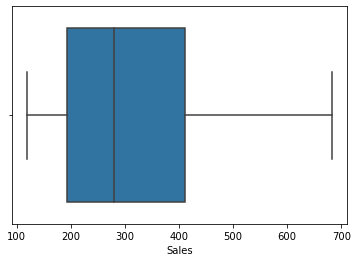

In [45]:
sns.boxplot(series.Sales)

In [46]:
# def Outliers(df,column_name):
#     df=df
#     for j in column_name:
#         Q3=df[j].quantile(0.75)
#         Q1=df[j].quantile(0.25)
#         IQR = df[j].quantile(0.75) - df[j].quantile(0.25)
#         H=1.5*IQR
#         Upper_Whiskar = Q3+H
#         Lower_Whiskar = Q1-H
#         Q95 = df[j].quantile(0.95)
#         Q05 = df[j].quantile(0.05)
    
#         print('Q3 for ',j, ': ', Q3)
#         print('Q1 for ',j,': ', Q1)
#         print('IQR for ',j,': ', IQR)
#         print('H for ',j,': ', H)
#         print('Upper Whiskar for ',j,': ', Upper_Whiskar)
#         print('Lower Whiskar for ',j,': ', Lower_Whiskar)
    
#         print('95th Quantile for ',j,': ', Q95)
#         print('5th Quantile for',j,': ', Q05)
#         ##df3[j] = df[j].clip(lower=Lower_Whiskar,upper = Upper_Whiskar, inplace=False)
#         ##df[j].clip(lower=Lower_Whiskar,upper = Upper_Whiskar, inplace=True)
#         for i in df[j].index.tolist():
#             if(df.at[i,j]<Lower_Whiskar):
#                 df.at[i,j]= Q05
#             if(df.at[i,j]>Upper_Whiskar):
#                 df.at[i,j]=Q95

In [47]:
# Outliers(series,['Sales'])

In [48]:
# sns.boxplot(series.Sales)

In [171]:
#Plots

In [172]:
#Plot the timeseries

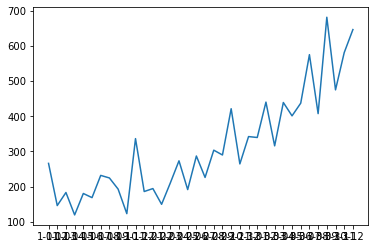

In [49]:
plt.plot(series)

In [175]:
#Decomposition plots

In [54]:
# result_mul = seasonal_decompose(series['Sales'], model='multiplicative', extrapolate_trend='freq', period=12)

# result_add = seasonal_decompose(series['Sales'], model='additive', extrapolate_trend='freq', period=12)

# plt.rcParams.update({'figure.figsize': (10,10)})
# result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
# result_add.plot().suptitle('Additive Decompose', fontsize=22)
# plt.show()

In [55]:
# print("Multiplicative Decomposition")
# df_reconstructed_mult = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
# df_reconstructed_mult.columns = ['seas', 'trend', 'resid', 'actual_values']
# print(df_reconstructed_mult.head())

# print("Addictive Decomposition")
# df_reconstructed_add = pd.concat([result_add.seasonal, result_add.trend, result_add.resid, result_add.observed], axis=1)
# df_reconstructed_add.columns = ['seas', 'trend', 'resid', 'actual_values']
# print(df_reconstructed_add.head())

In [177]:
# Statisctical Tests
# Case 1: Both tests conclude that the series is not stationary then it is series is not stationary
# Case 2: Both tests conclude that the series is stationary then it is series is stationary
# Case 3: KPSS = stationary and ADF = not stationary then it is trend stationary. Trend needs to be removed to make series strict stationary. The detrended series is checked for stationarity.
# Case 4: KPSS = not stationary and ADF = stationary then it is difference stationary. Differencing is to be used to make series stationary. The differenced series is checked for stationarity.

In [56]:
#ADF(Augmented Dickey-Fuller) Test
#if p value is less than 0.05, then timeseries is stationary else non stationary

In [57]:
X = series
adftest = adfuller(X)
print('ADF Statistic: %f' % adftest[0])
print('P-value: %f' % adftest[1])
print("Num Of Lags : ", adftest[2])
print("Num Of Observations Used For ADF Regression and Critical Values Calculation :", adftest[3])
print("Critical Values :")
for key, value in adftest[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 3.060142
P-value: 1.000000
Num Of Lags :  10
Num Of Observations Used For ADF Regression and Critical Values Calculation : 25
Critical Values :
	1%: -3.724
	5%: -2.986
	10%: -2.633


In [180]:
#KPSS(Kwiatkowski-Phillips-Schmidt-Shin) Test
#if p value > 0.05, then timeseries is stationary else not

In [58]:
X = series.values
kpsstest = kpss(X)
print('KPSS Statistic: %f' % kpsstest[0])
print('p-value: %f' % kpsstest[1])
print('Critical Values:')
for key,value in kpsstest[3].items():
    print('\t%s: %.3f' % (key, value))

KPSS Statistic: 0.439388
p-value: 0.060178
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


In [182]:
#Removing Trend

In [ ]:
#Transformation

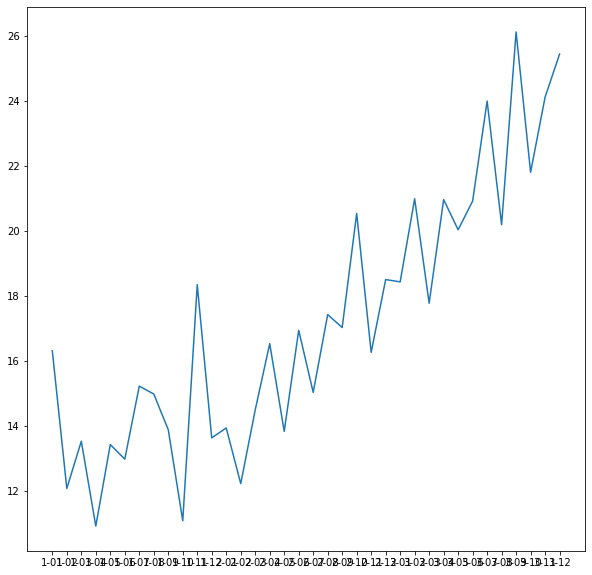

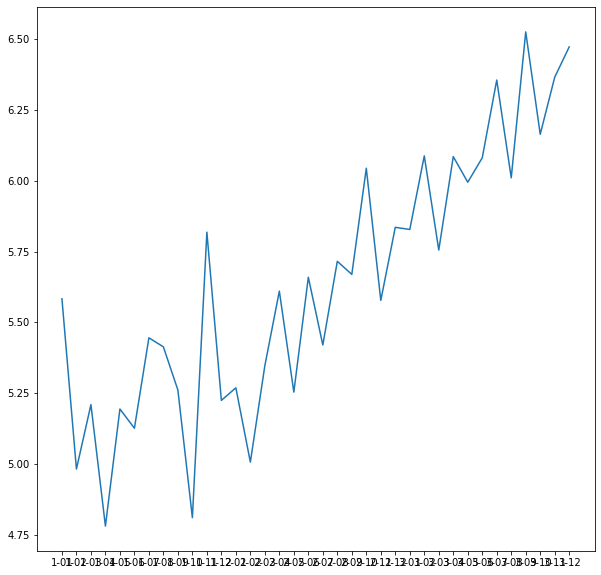

In [184]:
#A time series that has a quadratic growth trend can be made linear by taking the square root.
#A time series that has a exponential growth trend can be made linear by taking the log.
series_sqrt =np.sqrt(series) 
plt.plot(series_sqrt)
plt.show()
series_log=np.log(series)
plt.plot(series_log)
plt.show()

In [185]:
#Differencing

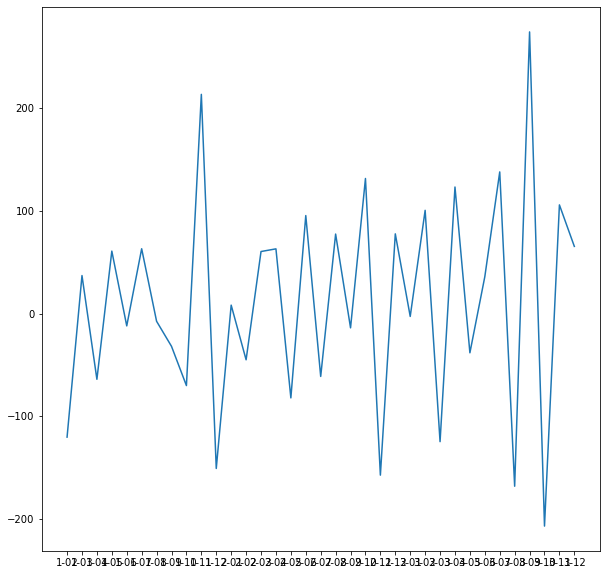

In [214]:
def difference(series, interval):
    series_values=series.values
    diff_series_list = []
    for i in range(interval, len(series_values)):
        value = series_values[i] - series_values[i - interval]
        diff_series_list.append(value)
    transformed_series=series.iloc[interval:,:]
    diff_series_df=pd.DataFrame(diff_series_list,columns=series.columns,index=transformed_series.index)
    return diff_series_df

def inverse_difference(series,diff_series,interval):
    series_values=series.values
    diff_series_values=diff_series.values
    inverted_series_list = []
    transformed_values_list=[]
    untransformed_values_array=series_values[0:interval]
    untransformed_values_list=np.concatenate(untransformed_values_array).ravel().tolist()
    for i in range(0,len(diff_series_values)):
        value=series_values[i]+diff_series_values[i]
        transformed_values_list.append(value)
    transformed_values_list=np.concatenate(transformed_values_list).ravel().tolist()
    inverted_series_list=untransformed_values_list+transformed_values_list
    inverted_series_df=pd.DataFrame(inverted_series_list,columns=series.columns,index=series.index)
    return inverted_series_df

interval=1
diff_series=difference(series,interval)
plt.plot(diff_series)
plt.show()
inverted_series=inverse_difference(series,diff_series,interval)

In [21]:
#Double Differencing

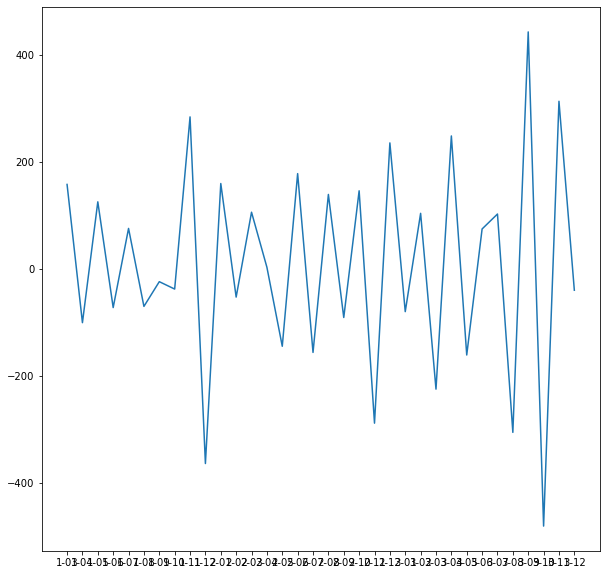

In [215]:
def difference(series, interval):
    series_values=series.values
    diff_series_list = []
    for i in range(interval, len(series_values)):
        value = series_values[i] - series_values[i - interval]
        diff_series_list.append(value)
    transformed_series=series.iloc[interval:,:]
    diff_series_df=pd.DataFrame(diff_series_list,columns=series.columns,index=transformed_series.index)
    return diff_series_df

def inverse_difference(series,diff_series,interval):
    series_values=series.values
    diff_series_values=diff_series.values
    inverted_series_list = []
    transformed_values_list=[]
    untransformed_values_array=series_values[0:interval]
    untransformed_values_list=np.concatenate(untransformed_values_array).ravel().tolist()
    for i in range(0,len(diff_series_values)):
        value=series_values[i]+diff_series_values[i]
        transformed_values_list.append(value)
    transformed_values_list=np.concatenate(transformed_values_list).ravel().tolist()
    inverted_series_list=untransformed_values_list+transformed_values_list
    inverted_series_df=pd.DataFrame(inverted_series_list,columns=series.columns,index=series.index)
    return inverted_series_df

interval=1
diff_series=difference(series,interval)
double_diff_series=difference(diff_series,interval)
plt.plot(double_diff_series)
plt.show()
double_inverted_series=inverse_difference(diff_series,double_diff_series,interval)
inverted_series=inverse_difference(series,double_inverted_series,interval)

In [23]:
# Differencing over transformation

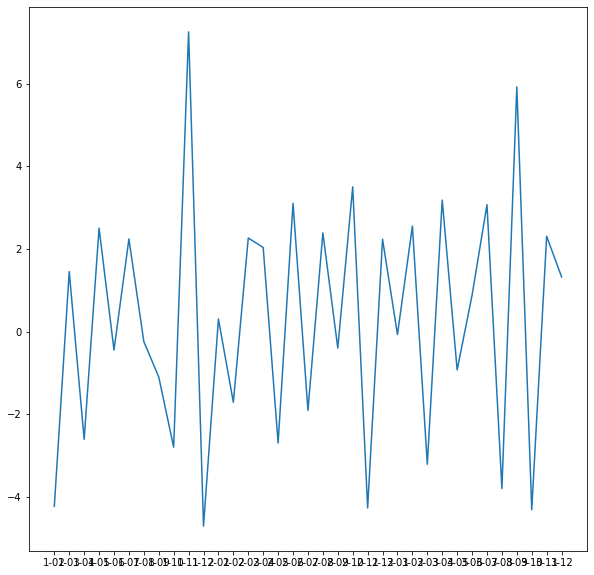

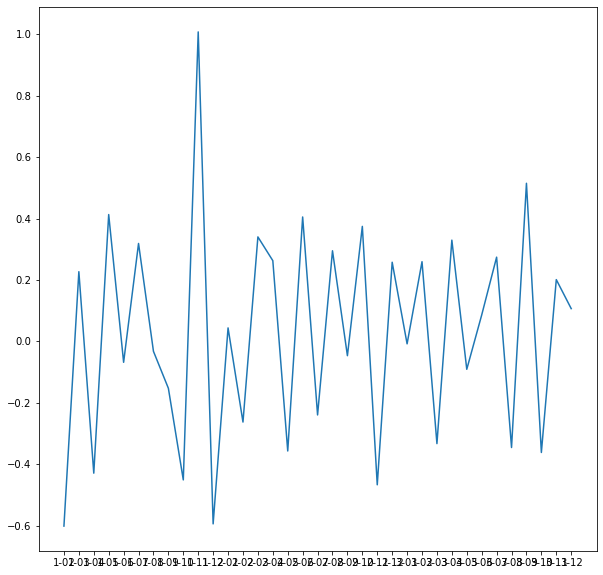

In [216]:
def difference(series, interval):
    series_values=series.values
    diff_series_list = []
    for i in range(interval, len(series_values)):
        value = series_values[i] - series_values[i - interval]
        diff_series_list.append(value)
    transformed_series=series.iloc[interval:,:]
    diff_series_df=pd.DataFrame(diff_series_list,columns=series.columns,index=transformed_series.index)
    return diff_series_df

def inverse_difference(series,diff_series,interval):
    series_values=series.values
    diff_series_values=diff_series.values
    inverted_series_list = []
    transformed_values_list=[]
    untransformed_values_array=series_values[0:interval]
    untransformed_values_list=np.concatenate(untransformed_values_array).ravel().tolist()
    for i in range(0,len(diff_series_values)):
        value=series_values[i]+diff_series_values[i]
        transformed_values_list.append(value)
    transformed_values_list=np.concatenate(transformed_values_list).ravel().tolist()
    inverted_series_list=untransformed_values_list+transformed_values_list
    inverted_series_df=pd.DataFrame(inverted_series_list,columns=series.columns,index=series.index)
    return inverted_series_df

interval=1
series_sqrt =np.sqrt(series)
diff_series=difference(series_sqrt,interval)
plt.plot(diff_series)
plt.show()
inverted_series=inverse_difference(series_sqrt,diff_series,interval)

series_log=np.log(series)
diff_series=difference(series_log,interval)
plt.plot(diff_series)
plt.show()
inverted_series=inverse_difference(series_log,diff_series,interval)

In [25]:
#Subtract the line of best fit from the time series

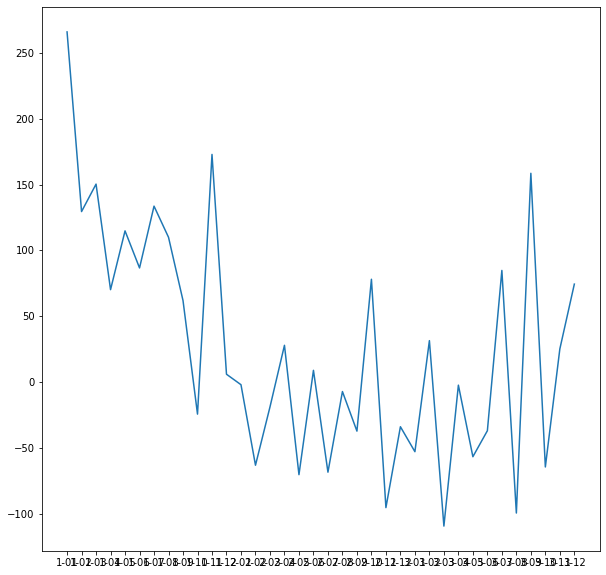

In [222]:
least_squares = OLS(series.Sales.values, list(range(series.shape[0])))
result = least_squares.fit()

fit = pd.Series(result.predict(list(range(series.shape[0]))), index = series.index)

series_without_line_of_best_fit = series.Sales - fit
plt.plot(series_without_line_of_best_fit)
plt.show()
series_without_line_of_best_fit=pd.DataFrame(series_without_line_of_best_fit,columns=series.columns,index=series.index)

In [27]:
#Differencing over timeseries obtained from subtracting the line of best fit from the time series

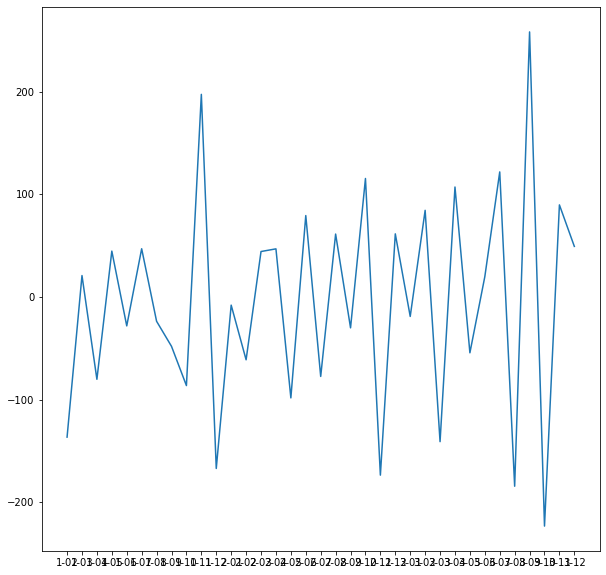

In [223]:
def difference(series, interval):
    series_values=series.values
    diff_series_list = []
    for i in range(interval, len(series_values)):
        value = series_values[i] - series_values[i - interval]
        diff_series_list.append(value)
    transformed_series=series.iloc[interval:,:]
    diff_series_df=pd.DataFrame(diff_series_list,columns=series.columns,index=transformed_series.index)
    return diff_series_df

def inverse_difference(series,diff_series,interval):
    series_values=series.values
    diff_series_values=diff_series.values
    inverted_series_list = []
    transformed_values_list=[]
    untransformed_values_array=series_values[0:interval]
    untransformed_values_list=np.concatenate(untransformed_values_array).ravel().tolist()
    for i in range(0,len(diff_series_values)):
        value=series_values[i]+diff_series_values[i]
        transformed_values_list.append(value)
    transformed_values_list=np.concatenate(transformed_values_list).ravel().tolist()
    inverted_series_list=untransformed_values_list+transformed_values_list
    inverted_series_df=pd.DataFrame(inverted_series_list,columns=series.columns,index=series.index)
    return inverted_series_df

interval=1
diff_series=difference(series_without_line_of_best_fit,interval)
plt.plot(diff_series)
plt.show()
inverted_series=inverse_difference(series_without_line_of_best_fit,diff_series,interval)

In [29]:
#Subtract the trend component obtained from Multiplicative time series decomposition

<AxesSubplot:>

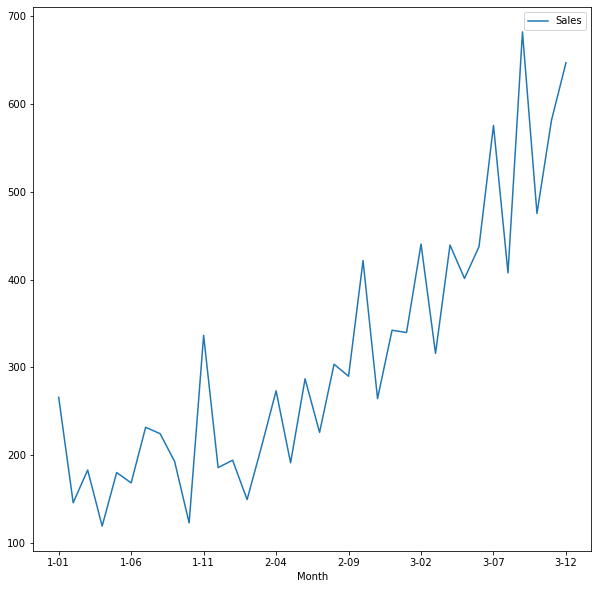

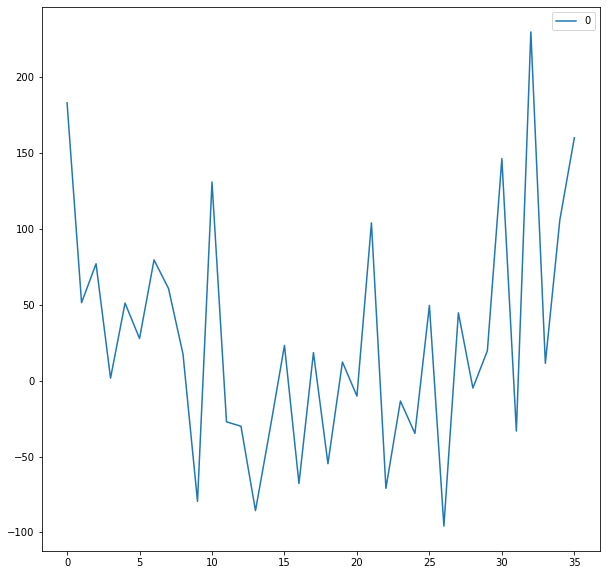

In [30]:
def detrend_mult_decompose(series,df_reconstructed_mult_trend):
    detrened_mult_decompose=list()
    for i in range(len(series)):
            value=series[i]-df_reconstructed_mult_trend[i]
            detrened_mult_decompose.append(value)
    return detrened_mult_decompose
                
X=series.values
detrened_mult_decompose=pd.DataFrame(detrend_mult_decompose(X,df_reconstructed_mult.trend))
series.plot()
detrened_mult_decompose.plot()

In [31]:
#Subtract the trend component obtained from Addictive time series decomposition

<AxesSubplot:>

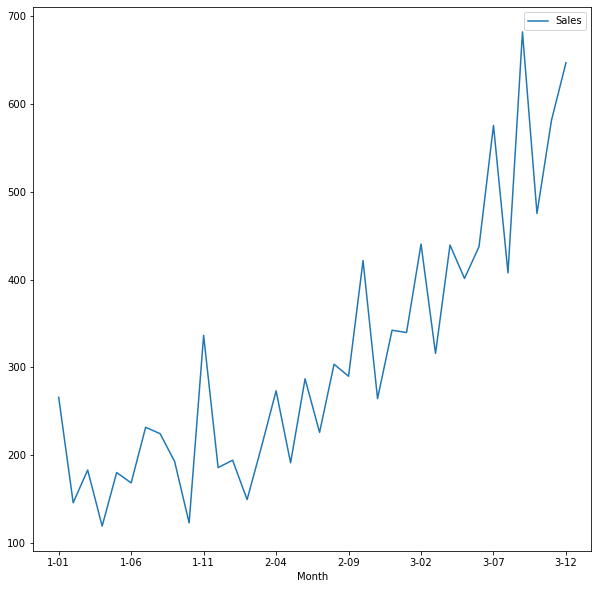

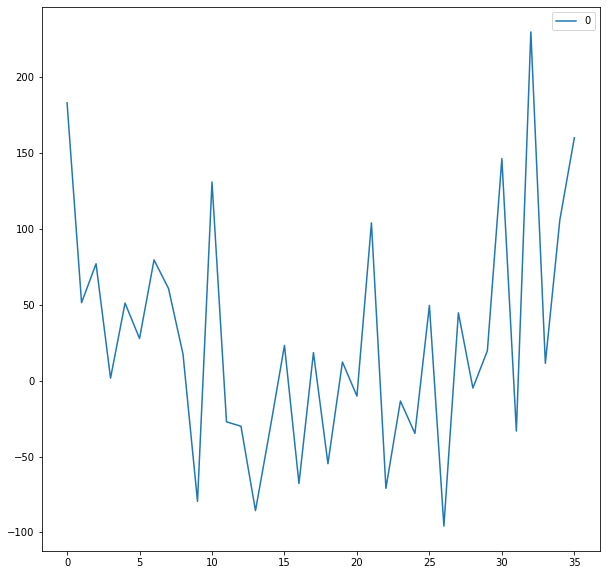

In [32]:
def detrend_add_decompose(series,df_reconstructed_add_trend):
    detrened_add_decompose=list()
    for i in range(len(series)):
            value=series[i]-df_reconstructed_add_trend[i]
            detrened_add_decompose.append(value)
    return detrened_add_decompose
                
X=series.values
detrened_add_decompose=pd.DataFrame(detrend_add_decompose(X,df_reconstructed_add.trend))
series.plot()
detrened_add_decompose.plot()

In [33]:
#REMOVING SEASONALITY

In [34]:
#Transformation

In [36]:
#Differencing

In [38]:
#Double Differencing

In [ ]:
#Seasonal Differencing

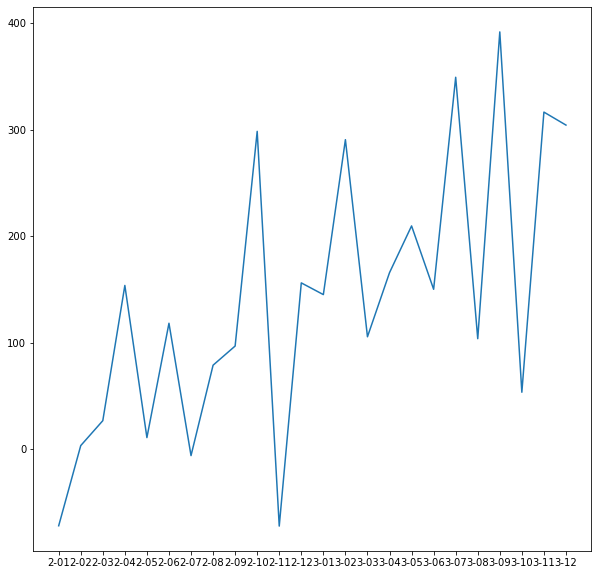

In [225]:
def difference(series, interval):
    series_values=series.values
    diff_series_list = []
    for i in range(interval, len(series_values)):
        value = series_values[i] - series_values[i - interval]
        diff_series_list.append(value)
    transformed_series=series.iloc[interval:,:]
    diff_series_df=pd.DataFrame(diff_series_list,columns=series.columns,index=transformed_series.index)
    return diff_series_df

def inverse_difference(series,diff_series,interval):
    series_values=series.values
    diff_series_values=diff_series.values
    inverted_series_list = []
    transformed_values_list=[]
    untransformed_values_array=series_values[0:interval]
    untransformed_values_list=np.concatenate(untransformed_values_array).ravel().tolist()
    for i in range(0,len(diff_series_values)):
        value=series_values[i]+diff_series_values[i]
        transformed_values_list.append(value)
    transformed_values_list=np.concatenate(transformed_values_list).ravel().tolist()
    inverted_series_list=untransformed_values_list+transformed_values_list
    inverted_series_df=pd.DataFrame(inverted_series_list,columns=series.columns,index=series.index)
    return inverted_series_df

interval=12
diff_series=difference(series,interval)
plt.plot(diff_series)
plt.show()
inverted_series=inverse_difference(series,diff_series,interval)

In [40]:
#Differencing over Transformation

In [42]:
#Subtract the trend component obtained from Addictive time series decomposition

In [44]:
#Differencing over timeseries obtained from subtracting the line of best fit from the time series

In [46]:
#Deseasonalizing from Multiplicative time series decomposition

<ipython-input-50-9acfa58dd7b8>:4: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  new_series.append(np.asscalar(diff_series[i]))


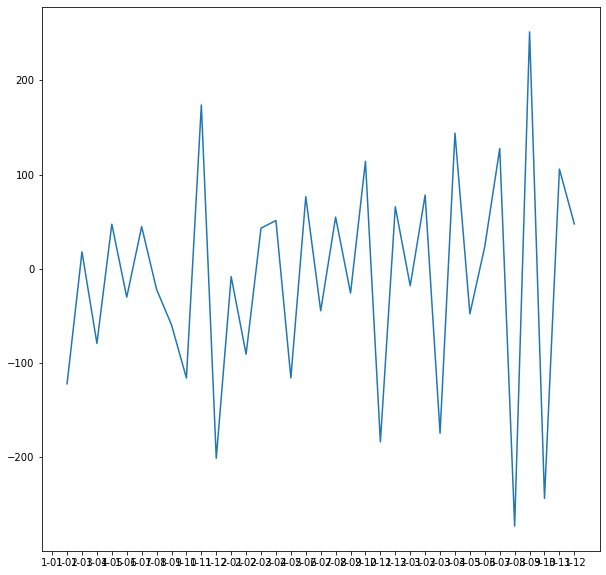

In [50]:
def new_series_creation(diff_series):
    new_series=list()
    for i in range(len(diff_series)):
        new_series.append(np.asscalar(diff_series[i]))
    return new_series

new_series=pd.Series(new_series_creation(diff_series))
index=series.index
index=index.delete([0])
new_series.index=index

deseasonalized_series_mult = new_series / result_mul.seasonal
plt.plot(deseasonalized_series_mult)

In [ ]:
#Deseasonalizing from Addictive time series decomposition

<ipython-input-51-380b4b849b2e>:4: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  new_series.append(np.asscalar(diff_series[i]))


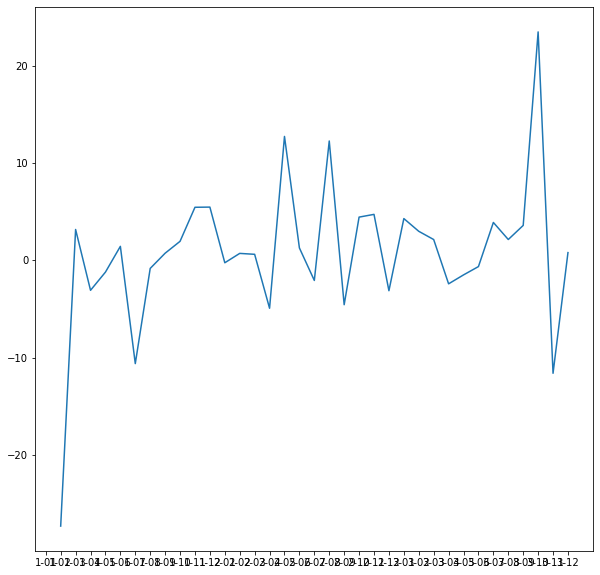

In [51]:
def new_series_creation(diff_series):
    new_series=list()
    for i in range(len(diff_series)):
        new_series.append(np.asscalar(diff_series[i]))
    return new_series

new_series=pd.Series(new_series_creation(diff_series))
index=series.index
index=index.delete([0])
new_series.index=index

deseasonalized_series_add = new_series / result_add.seasonal
plt.plot(deseasonalized_series_add)

In [ ]:
#Modelling

In [ ]:
#ARIMA

#p term 
#pacf plot

#q 
#acf plot

#d 
#differencing required to make it stationary

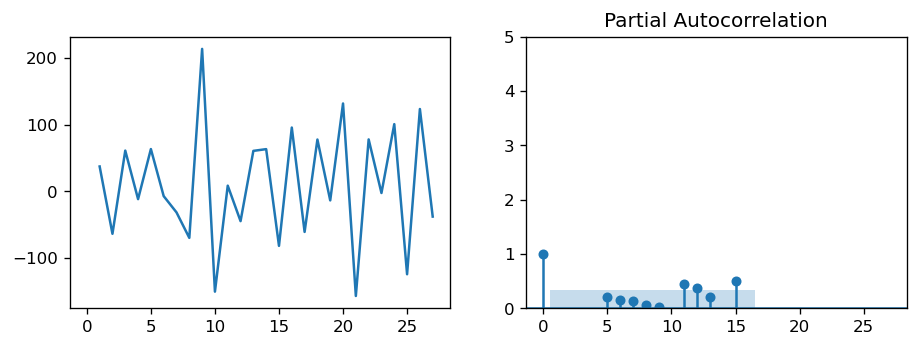

In [33]:
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
train=pd.DataFrame(train,columns=series.columns)
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(train.diff())
axes[1].set(ylim=(0,5))
plot_pacf(series.diff().dropna(), ax=axes[1])
plt.show()

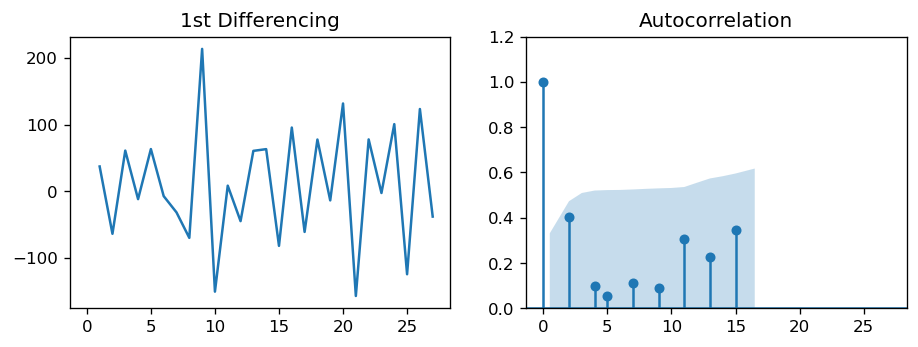

In [36]:
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
train=pd.DataFrame(train,columns=series.columns)
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(train.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(series.diff().dropna(), ax=axes[1])
plt.show()

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   27
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -146.976
Method:                       css-mle   S.D. of innovations             54.532
Date:                Fri, 19 Nov 2021   AIC                            301.953
Time:                        15:58:20   BIC                            307.136
Sample:                             1   HQIC                           303.494
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.6077      2.414      3.980      0.000       4.876      14.339
ar.L1.D.y     -0.4059      0.197     -2.063      0.039      -0.792      -0.020
ma.L1.D.y     -0.7120      0.170     -4.181      0.0

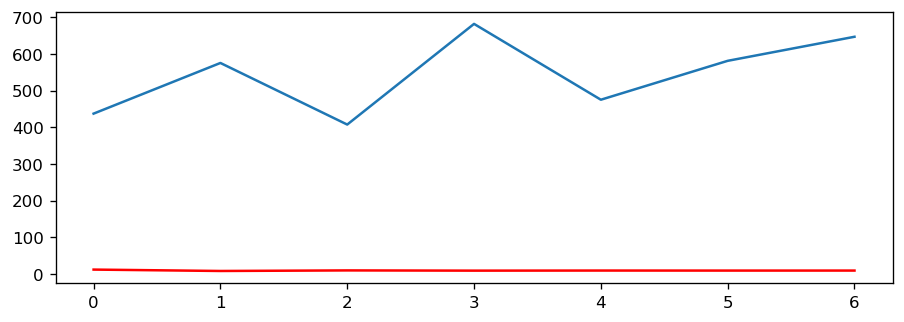

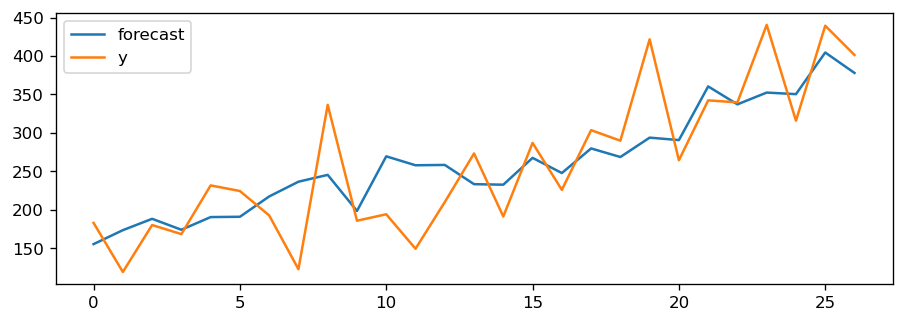

In [39]:
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
model = ARIMA(train, order=(1, 1, 1))
#order=(p,d,q)
#p-AR term
#d-Differencing term
#q-MA term
model_fit = model.fit()
print(model_fit.summary())
print('Coefficients: %s' % model_fit.params)
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
y_true, y_pred = np.array(test), np.array(predictions)
mape=np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print('Test Mape: %.3f' % mape)
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()
model_fit.plot_predict(dynamic=False)
plt.show()

In [ ]:
#SARIMA

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   28
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                   0.480
Date:                            Fri, 19 Nov 2021   AIC                              9.041
Time:                                    16:03:44   BIC                             -0.959
Sample:                                         0   HQIC                              -inf
                                             - 28                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          3.8289   5.46e-05   7.01e+04      0.000       3.829       3.829
ma.L1         -1.5359      0.000  -

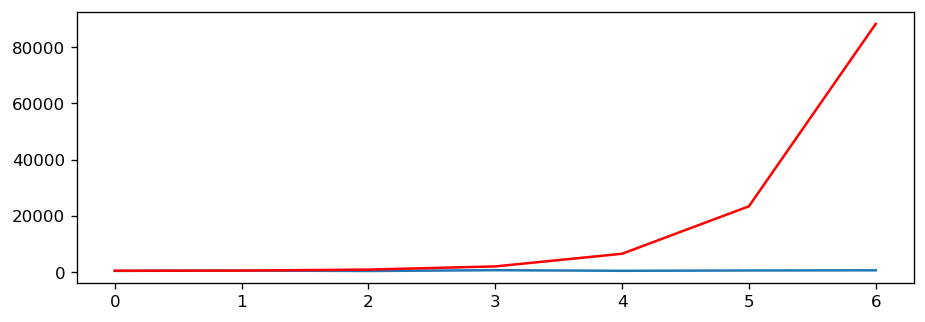

In [45]:
model = SARIMAX(train,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
#order=(p,d,q)(P,D,Q,m)
#p-Trend autoregression order.
#d-Trend differencing order.
#q-Trend moving average order
#P-seasonal autoregressive order.
#D-seasonal difference order.
#Q-seasonal moving average order.
#m-the number of time steps for a single seasonal period.
model_fit = model.fit()
print(model_fit.summary())
print('Coefficients: %s' % model_fit.params)
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
y_true, y_pred = np.array(test), np.array(predictions)
mape=np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print('Test Mape: %.3f' % mape)
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [ ]:
#SARIMAX

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   28
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                   0.244
Date:                            Fri, 19 Nov 2021   AIC                             11.512
Time:                                    16:05:20   BIC                             -0.488
Sample:                                         0   HQIC                              -inf
                                             - 28                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            27.3865   1.96e-05   1.39e+06      0.000      27.386      27.387
ar.L1         -0.9894      0.013   

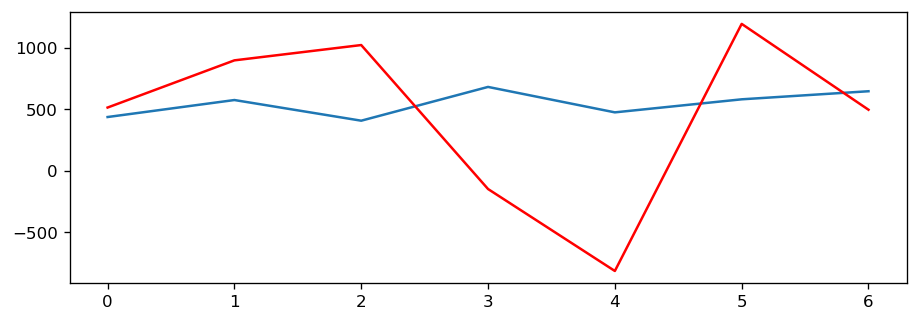

In [47]:
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
exog_train=np.random.rand(train.shape[0],train.shape[1])
exog_test=np.random.rand(test.shape[0],test.shape[1])
model = SARIMAX(train,
                                exog=exog_train,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
#order=(p,d,q)(P,D,Q)m
#p-Trend autoregression order.
#d-Trend differencing order.
#q-Trend moving average order
#P-seasonal autoregressive order.
#D-seasonal difference order.
#Q-seasonal moving average order.
#m-the number of time steps for a single seasonal period.
#exog-2d array of exogenous variables
model_fit = model.fit()
print(model_fit.summary())
print('Coefficients: %s' % model_fit.params)
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False,exog = exog_test)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
y_true, y_pred = np.array(test), np.array(predictions)
mape=np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print('Test Mape: %.3f' % mape)
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [ ]:
AUTO ARIMA/SARIMA/SARIMAX

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=322.654, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=300.772, Time=0.47 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=320.961, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=306.573, Time=0.09 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=3.81 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=1.00 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=3.79 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=317.544, Time=0.32 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=300.334, Time=0.66 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=307.036, Time=0.23 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=301.786, Time=3.29 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.89 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=inf, Time=1.06

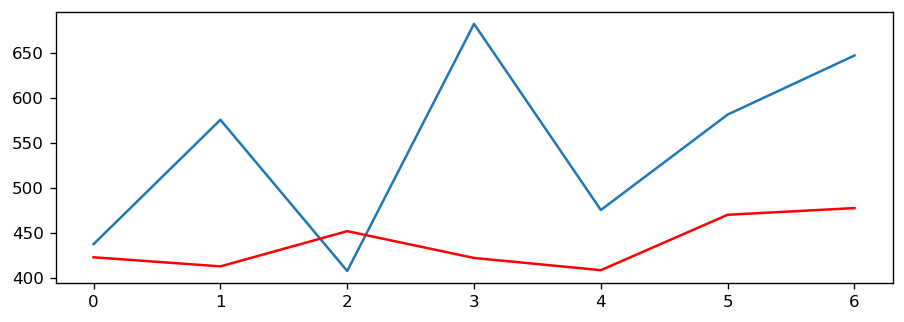

In [58]:
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# exog_train=np.random.rand(train.shape[0],train.shape[1])
# exog_test=np.random.rand(test.shape[0],test.shape[1])
model = pm.auto_arima(train, start_p=0,
                         start_d=0, start_q=0,
                         max_p=5, max_d=2, max_q=5,
                         start_P=0, start_D=0, start_Q=0,
                         max_P=5,max_D=2,max_Q=5,m=12, 
                         seasonal=True,
                         trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True
                         #exogenous=exog_train
                     )
model_fit = model.fit(train)
print(model_fit.summary())
print('Coefficients: %s' % model_fit.params)
predictions = model_fit.predict(n_periods=7
#                                exogenous=exog_test
                               ) 
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
y_true, y_pred = np.array(test), np.array(predictions)
mape=np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print('Test Mape: %.3f' % mape)
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [ ]:
#Ses

predicted=398.259840, expected=437.400000
predicted=398.259840, expected=575.500000
predicted=398.259840, expected=407.600000
predicted=398.259840, expected=682.000000
predicted=398.259840, expected=475.300000
predicted=398.259840, expected=581.300000
predicted=398.259840, expected=646.900000
Test Mape: 24.253


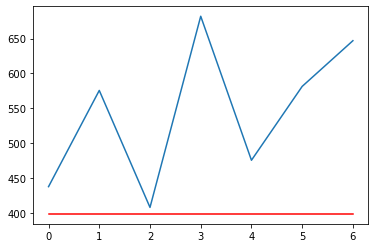

In [22]:
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
train=pd.DataFrame(train)
smoothing_level=0.5
fitted_model = SimpleExpSmoothing(train).fit(smoothing_level,optimized=False)
predictions = fitted_model.forecast(7).rename(r'$\alpha={}$'.format(smoothing_level)).tolist()

for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
y_true, y_pred = np.array(test), np.array(predictions)
mape=np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print('Test Mape: %.3f' % mape)
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [ ]:
#Holt Linear model

predicted=427.482833, expected=437.400000
predicted=441.696847, expected=575.500000
predicted=456.383484, expected=407.600000
predicted=471.558459, expected=682.000000
predicted=487.238010, expected=475.300000
predicted=503.438913, expected=581.300000
predicted=520.178505, expected=646.900000
Test Mape: 17.794


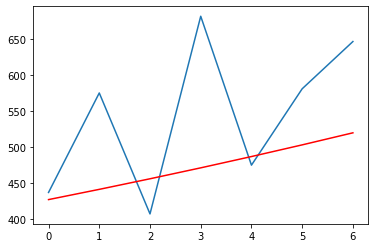

In [28]:
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
train=pd.DataFrame(train)
smoothing_level=0.5
smoothing_slope=0.5
exponential=True
fitted_model = Holt(train,exponential=exponential).fit(smoothing_level,smoothing_slope,optimized=False)
predictions = fitted_model.forecast(7).rename('Holt linear').tolist()

for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
y_true, y_pred = np.array(test), np.array(predictions)
mape=np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print('Test Mape: %.3f' % mape)
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [ ]:
#Holt winter

predicted=426.227334, expected=437.400000
predicted=433.729135, expected=575.500000
predicted=501.669983, expected=407.600000
predicted=448.016992, expected=682.000000
predicted=441.246618, expected=475.300000
predicted=558.130177, expected=581.300000
predicted=473.008137, expected=646.900000
Test Mape: 18.251


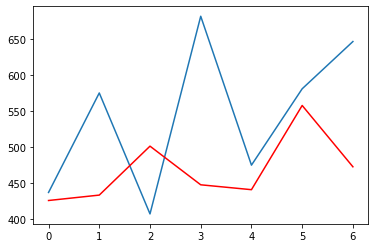

In [43]:
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
train=pd.DataFrame(train)
seasonal_periods=12
trend='add'
seasonal='mul'
use_boxcox=True
damped=True
fitted_model = ExponentialSmoothing(train,seasonal_periods=seasonal_periods,trend=trend,seasonal=seasonal,damped=damped).fit(use_boxcox=use_boxcox)
predictions = fitted_model.forecast(7).rename('Holt Winter').tolist()

for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
y_true, y_pred = np.array(test), np.array(predictions)
mape=np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print('Test Mape: %.3f' % mape)
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [ ]:
#Multivariate Timeseries Forecasting

In [4]:
os.chdir(r'C:\Users\vish\Documents\Data\Dataset')
df = pd.read_excel("AirQualityUCI.xlsx", parse_dates=[['Date', 'Time']])
df['Date_Time'] = pd.to_datetime(df.Date_Time , format = '%d/%m/%Y %H.%M.%S')
series = df.drop(['Date_Time'], axis=1)
series.index = df.Date_Time
series.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date_Time,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
2004-03-10 19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2004-03-10 20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
2004-03-10 21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
2004-03-10 22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [5]:
series.dtypes

CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)           int64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

In [ ]:
#VAR

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 27, Feb, 2022
Time:                     02:33:13
--------------------------------------------------------------------
No. of Equations:         13.0000    BIC:                    78.1015
Nobs:                     9348.00    HQIC:                   78.0096
Log likelihood:          -536649.    FPE:                7.22176e+33
AIC:                      77.9624    Det(Omega_mle):     7.08262e+33
--------------------------------------------------------------------
Results for equation y1
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
const        -12.485628         9.851810           -1.267           0.205
L1.y1          0.681836         0.006540          104.263           0.000
L1.y2         -0.003125         0.005201           -0.601           0.548
L1.y3          0.

    CO(GT) PT08.S1(CO) NMHC(GT) C6H6(GT) PT08.S2(NMHC)  NOx(GT) PT08.S3(NOx)  \
0 -1.43344      1357.2 -195.433  16.3704       1196.25  561.906      494.408   
1 -4.38626     1330.45 -192.563  15.2501       1169.32  529.809      517.638   
2 -6.29719     1304.23 -190.911  14.0875       1141.71  499.428      539.821   
3 -7.76172     1279.18 -190.128  12.9355       1114.58  471.453      560.764   
4 -9.02526     1255.68 -189.953  11.8262       1088.67  446.038       580.31   
5 -10.1873     1233.93 -190.189  10.7788       1064.45  423.125      598.365   
6 -11.2866     1214.04 -190.684   9.8032       1042.13  402.568      614.895   

   NO2(GT) PT08.S4(NO2) PT08.S5(O3)        T       RH        AH  
0  153.896      1565.31     1455.42  9.66407  59.7906  0.241308  
1  150.082      1529.64     1443.64  9.59391  57.8641 -0.265651  
2  145.157      1494.83     1424.86  9.48263  56.1358 -0.763751  
3  139.952      1461.97      1401.4  9.34146  54.5915  -1.24611  
4  134.819      1431.68     1

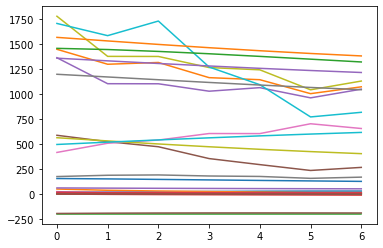

In [6]:
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
model = VAR(endog=train)
# model = VARMAX(endog=train,order=(1,0))
model_fit = model.fit()
print(model_fit.summary())
print('Coefficients: %s' % model_fit.params)
predictions = model_fit.forecast(model_fit.y, steps=len(test))
pred = pd.DataFrame(index=range(0,len(predictions)),columns=series.columns)
for j in range(0,series.shape[1]):
    for i in range(0, len(predictions)):
       pred.iloc[i][j] = predictions[i][j]
print(series.tail(len(test)))
print(pred.head(len(test)))
test=pd.DataFrame(test,columns=series.columns)
for i in series.columns:
    y_true, y_pred = np.array(test[i]), np.array(pred[i])
    print('mape value for', i, 'is : ', np.mean(np.abs((y_true - y_pred) / y_true)) * 100)
plt.plot(test)
plt.plot(predictions)
plt.show()

In [ ]:
#VARMA

In [9]:
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
model = VARMAX(endog=train,order=(1,1))
model_fit = model.fit()
print(model_fit.summary())
print('Coefficients: %s' % model_fit.params)
predictions = model_fit.forecast(model_fit, steps=len(test))
pred = pd.DataFrame(index=range(0,len(predictions)),columns=series.columns)
for j in range(0,series.shape[1]):
    for i in range(0, len(predictions)):
       pred.iloc[i][j] = predictions[i][j]
print(series.tail(len(test)))
print(pred.head(len(test)))
test=pd.DataFrame(test,columns=series.columns)
for i in series.columns:
    y_true, y_pred = np.array(test[i]), np.array(pred[i])
    print('mape value for', i, 'is : ', np.mean(np.abs((y_true - y_pred) / y_true)) * 100)
plt.plot(test)
plt.plot(predictions)
plt.show()

In [ ]:
#VARMAX

In [ ]:
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
exog_train=np.random.rand(train.shape[0],train.shape[1])
exog_test=np.random.rand(test.shape[0],test.shape[1])
model = VARMAX(endog=train,order=(1,1),exog=exog_train)
model_fit = model.fit()
print(model_fit.summary())
print('Coefficients: %s' % model_fit.params)
predictions = model_fit.forecast(model_fit, steps=len(test),exog=exog_test)
pred = pd.DataFrame(index=range(0,len(predictions)),columns=series.columns)
for j in range(0,series.shape[1]):
    for i in range(0, len(predictions)):
       pred.iloc[i][j] = predictions[i][j]
print(series.tail(len(test)))
print(pred.head(len(test)))
test=pd.DataFrame(test,columns=series.columns)
for i in series.columns:
    y_true, y_pred = np.array(test[i]), np.array(pred[i])
    print('mape value for', i, 'is : ', np.mean(np.abs((y_true - y_pred) / y_true)) * 100)
plt.plot(test)
plt.plot(predictions)
plt.show()